In [2]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install seaborn
import pandas as pd

import csv
import re # for regular expression
import string

import nltk 
from nltk.tokenize import RegexpTokenizer # devide the words 
from collections import Counter #count the number of word for each list 

import numpy as np 
import matplotlib.pyplot as plt

import seaborn


#import plotly
#import plotly.plotly as py
#import plotly.graph_objs as go
#plotly.tools.set_credentials_file(username='XXXXXX', api_key='XXXXXXX')

%matplotlib inline

In [8]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

#read file

# Import data using datetime and set index to datetime
boulder_july_2018 = pd.read_csv('FINAL_DATASET.csv',
                                parse_dates=['Date'],
                                index_col=['Date'])

boulder_july_2018.head()

,Tweets,ID,Likes,RTs,clean_text,sentiment
Date,,,,,,
2020-02-10 22:27:00,ولك خمس ذبايح إذا ركبت شركةstc الألياف البصرية...,1.227000e+18,0.0,0.0,ولك خمس ذبايح اذا ركبت شركهstc الالياف البصريه...,negative
2020-01-29 18:06:00,احمد ربك مو stc الالياف لها سنة عطلانة ولا تصل...,1.222580e+18,1.0,0.0,احمد ربك مو stc الالياف لها سنه عطلانه ولا تصل...,negative
2020-01-08 13:34:00,لحظة مو انت كان عندك stc الألياف أو انا غلطان,1.214900e+18,0.0,0.0,لحظه مو انت كان عندك stc الالياف او انا غلطان,neutral
2019-12-31 12:45:00,Stc الالياف البصرية,1.211990e+18,0.0,0.0,Stc الالياف البصريه,neutral
2019-12-29 03:49:00,ما يبي لها STC .. الالياف البصريه,1.211130e+18,0.0,0.0,ما يبي لها STC الالياف البصريه,positive


In [9]:
boulder_july_2018.dtypes


Tweets         object
ID            float64
Likes         float64
RTs           float64
clean_text     object
sentiment      object
dtype: object

In [10]:


boulder_july_2018.dropna()
boulder_july_2018.dropna(how='all')
boulder_july_2018.dropna(inplace=True)

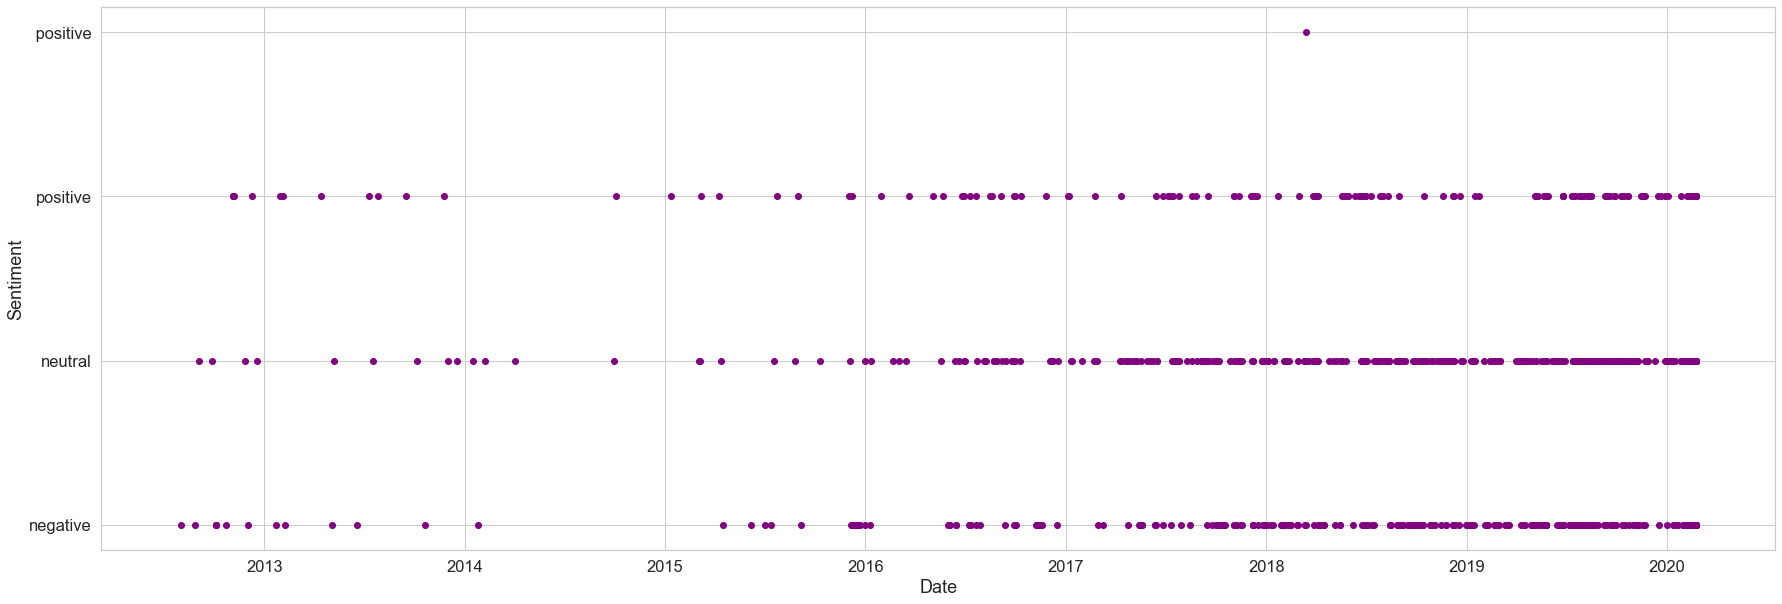

In [77]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(30, 10))

# Add x-axis and y-axis
ax.scatter(boulder_july_2018.index.values,
        boulder_july_2018['sentiment'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Sentiment",
       title="")

plt.show()

In [48]:
import matplotlib.pyplot as plt

In [2]: plt.close('all')

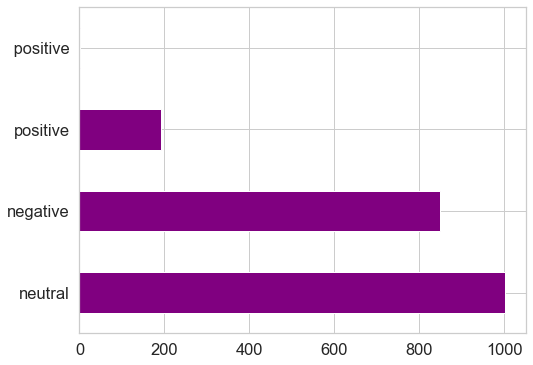

In [79]:
boulder_july_2018['sentiment'].value_counts()[:20].plot(kind='barh',color='purple')


In [21]:
import matplotlib.pyplot as plt
import numpy as np

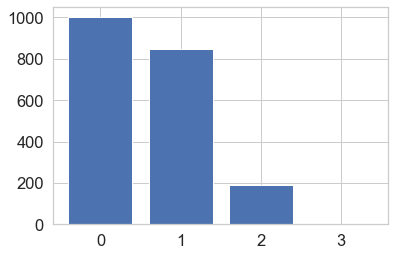

neutral      1001
negative      848
positive      192
 positive       1
Name: sentiment, dtype: int64


In [22]:
counts = boulder_july_2018["sentiment"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()
print(counts)

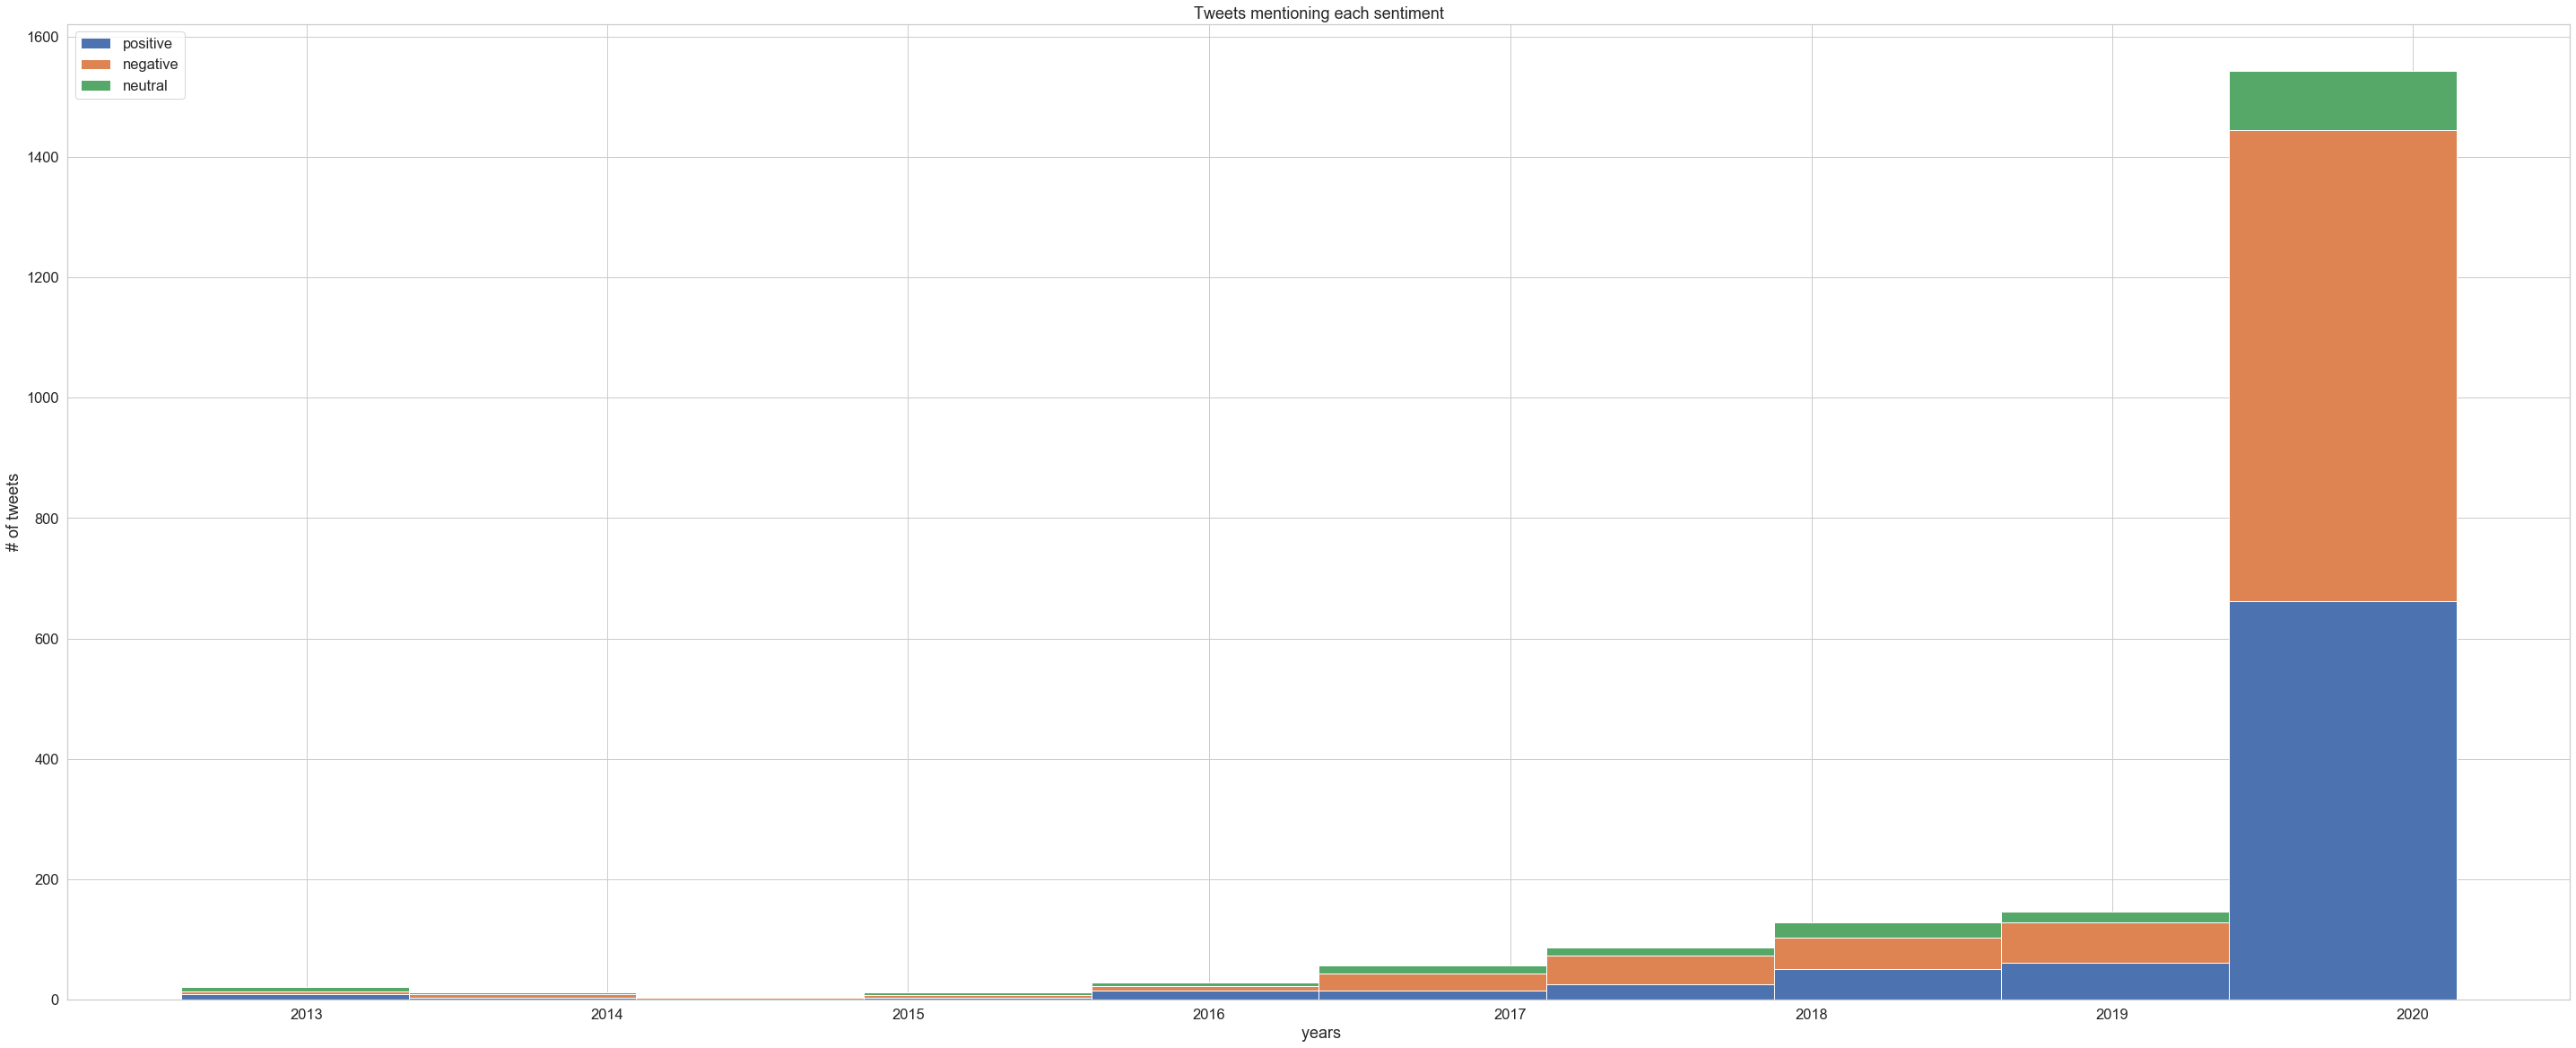

In [45]:
cl_tweets = boulder_july_2018.index.values[boulder_july_2018["sentiment"] == "negative"]
sa_tweets = boulder_july_2018.index.values[boulder_july_2018["sentiment"] == "neutral"]
tr_tweets = boulder_july_2018.index.values[boulder_july_2018["sentiment"] == "positive"]

fig= plt.figure(figsize=(50,20))

plt.hist([
         cl_tweets,
         sa_tweets,
             tr_tweets

    ],
     stacked=True,
     label=["positive", "negative","neutral"])
plt.legend()

plt.title("Tweets mentioning each sentiment")
plt.xlabel(" years")
plt.ylabel("# of tweets")

plt.show()


In [65]:
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

boulder_july_2018["tweet_length"] = boulder_july_2018["clean_text"].apply(tweet_lengths)

tl = {}
for candidate in ["negative",  "positive"]:
    tl[candidate] = boulder_july_2018["tweet_length"][boulder_july_2018["sentiment"] == candidate].value_counts()

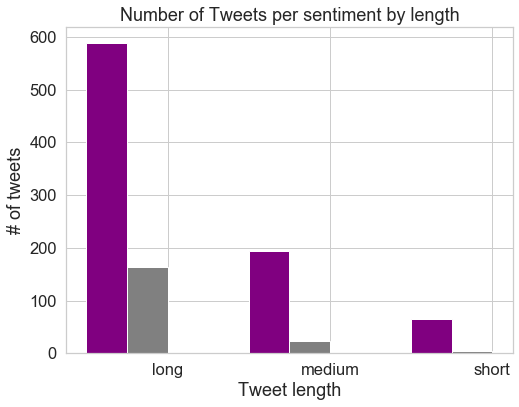

In [82]:
fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 6, 2))
ax.bar(x, tl["negative"], width, color='purple')

ax.bar(x + (width * 1), tl["positive"], width, color='gray')

ax.set_ylabel('# of tweets')
ax.set_title('Number of Tweets per sentiment by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')

plt.show()

8.0
6.0


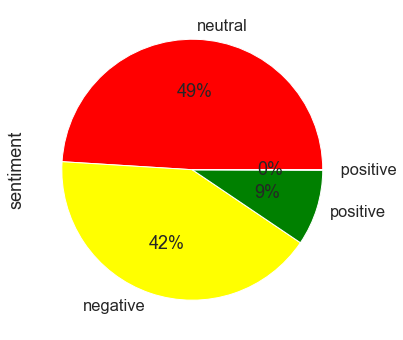

In [71]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

boulder_july_2018["sentiment"].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])


